In [1]:
from IPython.core.magic import (
    register_line_magic,
    register_cell_magic,
    register_line_cell_magic,
    magics_class,
    Magics
)
from IPython import get_ipython
from cProfile import Profile
from pstats import SortKey, Stats
import sys, os, re, subprocess
@register_line_cell_magic
def profile(line, cell=None):
    """
        `profile`
    Profile the code by using cProfile and pstats, and print the cumulative
    time spent on each function.
    """
    if cell is None:
        code = line
    # TODO: Implement the logic for getting configs from the %%profile
    else:
        code = cell
        config = line
    old_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')
    _profile = Profile()
    _profile.runctx(code, globals(), locals())
    sys.stdout = old_stdout
    s = Stats(_profile)
    s.strip_dirs()
    s.sort_stats(SortKey.CUMULATIVE)
    s.print_callees()

In [2]:
%load_ext autoreload
%autoreload 2

In [47]:
def kickout(A1, KG, KB):
    """
    Calcula a taxa de kickout do modelo BM.
    # """

    # if KG == KB == 0:
    #     return 0, 0, 0

    p_B = KB / A1 if A1 and KB else 1e-8

    # if p_B == 1e-8 and KG > 0:
    #     return -1, KG, KB

    SB = KB or 1e-8

    kickout = ((KB / p_B) - (KG / (1 - p_B))) / (SB / p_B)

    return kickout, p_B

kickout(A1=10000, KG=90, KB=00)


(-90.00000090000002, 1e-08)

(0.0, 0, 0)

Juntar results (falta AUK)

#<font color='orange'>Basics</font>

In [3]:
seeds = [120054, 388388, 570334, 907360, 938870]
percent_bads = [0.07, 0.08, 0.09, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.36, 0.4]
sizes = [1000, 5000, 10000]
contaminations = [0.12, ]#0.13, 0.14, 0.15, 0.16, 0.18, 0.2, ]#0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4]

len(seeds)*len(percent_bads)*len(sizes)*len(contaminations)#*12/1024#*2/60

285

In [4]:
#@title **Location** of the dataset
path =  "../data/HomeCredit/"
process_path = "../data/ProcessedData/"
save_path = "../tests/"
ri_datasets_path = "../data/riData/"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import secrets
import joblib
import sys
import os
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from scipy.stats import ks_2samp
from lightgbm import LGBMClassifier
from pathlib import Path
from sklearn.metrics import (roc_auc_score)
from sklearn.model_selection import KFold


In [6]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                            f1_score, precision_score, recall_score,
                            roc_auc_score, roc_curve)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelSpreading

In [8]:
import credit_pipeline.data_exploration as dex
import credit_pipeline.training as tr
import credit_pipeline.reject_inference as ri

from submodules.topsis_python import topsis as top
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
import seaborn as sns

In [9]:
!du -sh ../data/riData/Models/TN-2010/*

657M	../data/riData/Models/TN-2010/120055
656M	../data/riData/Models/TN-2010/388389
656M	../data/riData/Models/TN-2010/570335
657M	../data/riData/Models/TN-2010/907361
656M	../data/riData/Models/TN-2010/938871


In [10]:
ls -l -h ../data/riData/Models/TN-2009/

total 20K
drwxrwxr-x 2 athyrson athyrson 4,0K jun 28 16:04 120054/
drwxrwxr-x 2 athyrson athyrson 4,0K jun 28 16:03 388388/
drwxrwxr-x 2 athyrson athyrson 4,0K jun 28 16:02 570334/
drwxrwxr-x 2 athyrson athyrson 4,0K jun 28 15:59 907360/
drwxrwxr-x 2 athyrson athyrson 4,0K jun 28 16:00 938870/


In [11]:
!find ../data/riData/Models -type f | wc -l

641


In [12]:
seeds = [120054, 388388, 570334, 907360, 938870]
year = 2009
file_init = pd.DataFrame()

for seed_number in seeds:
    year = year + (year - 2009)
    folder = os.path.join(ri_datasets_path,f'Data/TN-{year}/{seed_number}/')
    print(f'there are {len(os.listdir(folder))} files in {folder}')

    for file in os.listdir(folder):
        if file_init.shape == (0,0):
            file_init = pd.read_parquet(os.path.join(folder, file))
        filename = os.path.join(folder, file)
        try:
            pd.read_parquet(filename).shape == file_init.shape
        except Exception as e:
            print(f'Error in {filename}: {e}')
    print(file_init.shape)

there are 57 files in ../data/riData/Data/TN-2009/120054/
(33680, 2)
there are 57 files in ../data/riData/Data/TN-2009/388388/
(33680, 2)
there are 57 files in ../data/riData/Data/TN-2009/570334/
(33680, 2)
there are 57 files in ../data/riData/Data/TN-2009/907360/
(33680, 2)
there are 57 files in ../data/riData/Data/TN-2009/938870/
(33680, 2)


In [13]:
57*5

285

In [14]:
[x%5 for x in [120054, 388388, 570337, 907361, 938870]]

[4, 3, 2, 1, 0]

#Evaluate the model using the test data for years

In [15]:
# Diretório onde os arquivos CSV estão localizados
folder_path = os.path.join(ri_datasets_path, f'metrics_bm/test/')

# Lista todos os arquivos na pasta
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Cria uma lista de DataFrames a partir de cada arquivo CSV
dataframes = []
for file in csv_files:
    tempdf = pd.read_csv(os.path.join(folder_path, file))
    tempdf['Year'] = int(file[-8:-4])
    tempdf['Seed'] = int(file[4:10])
    # tempdf.drop(columns=['metadata'], inplace=True)
    tempdf = tempdf.rename(columns={tempdf.columns[0]: 'Metrics'})
    tempdf = tempdf.loc[tempdf['Metrics'].isin(['AUC', 'KS', 'Kickout', 'AUK'])]
    dataframes.append(tempdf)

# Exemplo: concatenar todos os DataFrames em um único DataFrame (opcional)
combined_df = pd.concat(dataframes, ignore_index=True)

# Exibe o DataFrame combinado (ou você pode usar cada DataFrame individualmente)
combined_df


,Metrics,BM,A-SC,A-UW,A-FU,E-C,PAR,LSP,TN,Year,Seed
0,AUC,0.8903,0.8902,0.8904,0.8844,0.8834,0.8802,0.8855,0.8881,2012,938873
1,KS,0.6543,0.6531,0.6528,0.6417,0.6449,0.6348,0.6460,0.6483,2012,938873
2,Kickout,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0005,0.1550,2012,938873
3,AUK,0.0012,0.0004,0.0011,-0.0200,-0.0257,-0.0202,0.0340,0.1721,2012,938873
4,AUC,0.9306,0.9297,0.9305,0.9276,0.9259,0.9273,0.9139,0.9278,2014,907366
...,...,...,...,...,...,...,...,...,...,...,...
135,AUK,0.0000,-0.0152,0.0000,0.0000,-0.0308,-0.0301,0.0860,0.0941,2009,570334
136,AUC,0.8664,0.8644,0.8670,0.8681,0.8595,0.8654,0.8444,0.8671,2010,907361
137,KS,0.5973,0.6009,0.6019,0.6082,0.5901,0.6026,0.5570,0.6046,2010,907361
138,Kickout,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0662,2010,907361


In [16]:
tempdf.loc[tempdf['Metrics'].isin(['AUC', 'KS', 'Kickout', 'AUK'])]

,Metrics,BM,A-SC,A-UW,A-FU,E-C,PAR,LSP,TN,Year,Seed
0,AUC,0.8664,0.8644,0.8670,0.8681,0.8595,0.8654,0.8444,0.8671,2010,907361
1,KS,0.5973,0.6009,0.6019,0.6082,0.5901,0.6026,0.5570,0.6046,2010,907361
7,Kickout,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0662,2010,907361
8,AUK,0.0000,0.0005,0.0000,0.0000,0.0017,-0.0004,0.0319,0.0991,2010,907361


In [17]:
combined_df.groupby(['Year', 'Metrics']).mean()

BM     A-SC     A-UW     A-FU      E-C      PAR      LSP  \
Year Metrics                                                                  
2009 AUC      0.74296  0.74156  0.74232  0.73202  0.72766  0.72406  0.66318   
     AUK      0.00000 -0.00304  0.00000 -0.00400 -0.00888 -0.01074  0.09126   
     KS       0.38534  0.37984  0.37922  0.37100  0.36386  0.35978  0.25988   
     Kickout  0.00000  0.00868  0.00000  0.00000  0.00000  0.00000  0.15946   
2010 AUC      0.86778  0.86384  0.86802  0.86650  0.86020  0.86470  0.84378   
     AUK      0.00000 -0.00130  0.00002 -0.00200 -0.00930 -0.00208  0.02574   
     KS       0.59956  0.59846  0.60234  0.60134  0.59016  0.60028  0.55052   
     Kickout  0.00000 -0.00044  0.00000  0.00000  0.00000  0.00000  0.00000   
2011 AUC      0.88648  0.88646  0.88656  0.88482  0.88056  0.88386  0.86810   
     AUK      0.00000  0.00000  0.00002 -0.00200 -0.04402 -0.00600 -0.07836   
     KS       0.63916  0.63862  0.63942  0.63432  0.62862  0.63222  0.59972   
     Kickout  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
2012 AUC      0.88980  0.88976  0.88988  0.88420  0.88336  0.88116  0.87958   
     AUK      0.00160 -0.00262  0.00156 -0.02008 -0.03060 -0.02428  0.02822   
     KS       0.65332  0.65150  0.65258  0.63860  0.64220  0.63828  0.63032   
     Kickout  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00048   
2013 AUC      0.90820  0.90814  0.90804  0.90464  0.90436  0.90302  0.88556   
     AUK      0.01236 -0.00556  0.00466 -0.01406 -0.02388 -0.01906  0.14442   
     KS       0.69490  0.69352  0.69428  0.68770  0.69248  0.68762  0.63628   
     Kickout  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.13266   
2014 AUC      0.93226  0.93174  0.93220  0.92946  0.92758  0.92844  0.91486   
     AUK      0.01396 -0.00050  0.01344 -0.00636 -0.02118 -0.02032  0.07036   
     KS       0.74928  0.74830  0.74916  0.74334  0.74642  0.74160  0.70318   
     Kickout  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00112   
2015 AUC      0.94964  0.94962  0.94964  0.94672  0.94462  0.94542  0.94030   
     AUK      0.05752  0.04072  0.04692 -0.01406 -0.01510 -0.01814  0.14482   
     KS       0.79474  0.79478  0.79480  0.78974  0.78954  0.78210  0.76892   
     Kickout  0.00000 -0.00002 -0.00002  0.00000  0.01310 -0.00016  0.05022   

                   TN      Seed  
Year Metrics                     
2009 AUC      0.73562  585001.2  
     AUK      0.07486  585001.2  
     KS       0.36988  585001.2  
     Kickout  0.17166  585001.2  
2010 AUC      0.86424  585002.2  
     AUK      0.13264  585002.2  
     KS       0.59314  585002.2  
     Kickout  0.30698  585002.2  
2011 AUC      0.88156  585003.2  
     AUK      0.11232  585003.2  
     KS       0.63292  585003.2  
     Kickout  0.32498  585003.2  
2012 AUC      0.88776  585004.2  
     AUK      0.18862  585004.2  
     KS       0.64842  585004.2  
     Kickout  0.19730  585004.2  
2013 AUC      0.90422  585006.0  
     AUK      0.12816  585006.0  
     KS       0.69090  585006.0  
     Kickout  0.12998  585006.0  
2014 AUC      0.92858  585007.0  
     AUK      0.08866  585007.0  
     KS       0.74426  585007.0  
     Kickout  0.04964  585007.0  
2015 AUC      0.94856  585008.0  
     AUK      0.08432  585008.0  
     KS       0.79294  585008.0  
     Kickout  0.06418  585008.0

#Test validation

seeds = [random_seed_1, random_seed_2, random_seed_3, random_seed_4, random_seed_5]
percent_bads = [0.07, 0.08, 0.09, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.36, 0.4]
sizes = [1000, 5000, 10000]

In [15]:
seeds = [120054, 388388, 570334, 907360, 938870]
percent_bads = [0.07, 0.08, 0.09, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.36, 0.4]
sizes = [1000, 5000, 10000]

In [16]:
print(len(percent_bads)*len(sizes))

57


In [17]:
seed_number = 388389
year = 2010
contamination_threshold = 0.12
weights = (1, 1)
criterias = (True, True)
low_AR, high_AR = (0, 100)
size = 1000
p_value = 0.07

In [18]:
load_path = os.path.join(ri_datasets_path, f'Load/{seed_number}_{year}')

if Path(f'{load_path}').exists():# and False:
        df_train = pd.read_csv(f'{load_path}/A_train.csv', index_col=0)
        df_val = pd.read_csv(f'{load_path}/A_val.csv', index_col=0)
        df_test = pd.read_csv(f'{load_path}/A_test.csv', index_col=0)
        R_train = pd.read_csv(f'{load_path}/R_train.csv', index_col=0)
        R_val = pd.read_csv(f'{load_path}/R_val.csv', index_col=0)
        R_test = pd.read_csv(f'{load_path}/R_test.csv', index_col=0)
        X_train = df_train.loc[:, df_train.columns != "target"]
        y_train = df_train["target"]
        X_val = df_val.loc[:, df_val.columns != "target"]
        y_val = df_val["target"]
        X_test = df_test.loc[:, df_test.columns != "target"]
        y_test = df_test["target"]

In [19]:

X_eval, y_eval, R_eval = X_val, y_val, R_val

In [20]:
filepath_ex = Path(os.path.join(ri_datasets_path,f'Models/TN-{year}/{seed_number}/{size}-{p_value}-{contamination_threshold}.joblib'))
filepath_models = Path(os.path.join(ri_datasets_path,f'Models/RI/models-{year}/{seed_number}.joblib'))

In [21]:
models_dict = joblib.load(filepath_models)
models_ex = joblib.load(filepath_ex)

In [22]:
df_TN = ri.get_metrics_RI(models_ex, X_eval, y_eval, X_unl=R_eval)
df_auc_ex = df_TN.loc['AUC', :]
df_ks_ex = df_TN.loc['KS', :]
df_kick_ex = ri.area_under_the_kick(models_ex, X_eval, y_eval, R_eval, low_AR, high_AR)
output_ex, best_values_ex = ri.evaluate_by_AUC_AUK(models_ex,  X_eval, y_eval, R_eval, weights, criterias, low_AR, high_AR)

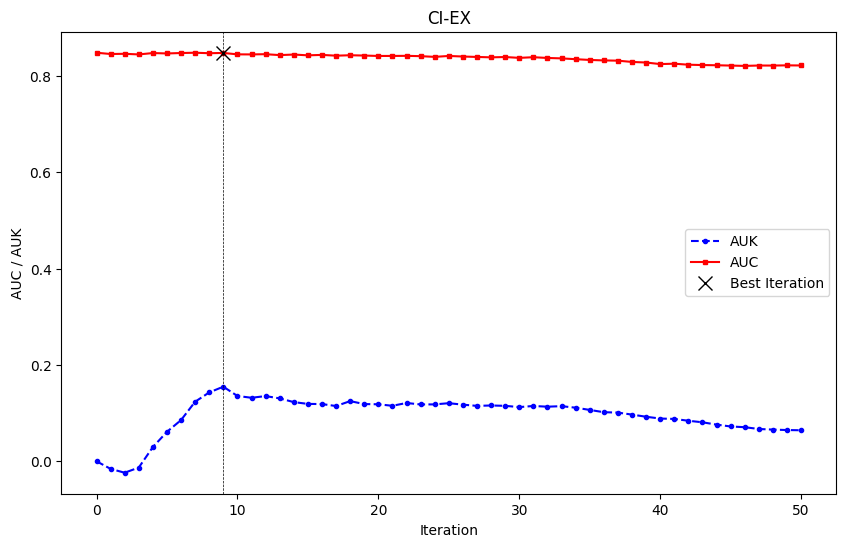

In [23]:
# Plot the AUC and kickout rate for each iteration of TN.
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the AUC and kickout rate for each iteration of TN (ex)
y_tn = np.arange(len(df_kick_ex.keys()))
axs.plot(y_tn, df_kick_ex.mean(), color='blue', linestyle='--', marker='o', markersize=3, label='AUK')
axs.plot(y_tn, df_auc_ex, color='red', linestyle='-', marker='s', markersize=3, label='AUC')
axs.plot(output_ex, best_values_ex[0], color='black', linestyle='', marker='x', markersize=10, label='Best Iteration')
axs.axvline(x=output_ex, color='black', linestyle='--', linewidth=0.5)
axs.set_title('CI-EX')
axs.set_xlabel('Iteration')
axs.set_ylabel('AUC / AUK')
axs.legend()




filename = Path(os.path.join(ri_datasets_path, f'TN_AUC_AUK/CI-EX-val_{year}_{seed_number}_{p_value}.png'))
filename.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(filename)


In [24]:
# Define the file path
file_path = Path(os.path.join(ri_datasets_path,f'Data/VAL/TN-{2010}-results.csv'))

# Check if the file exists
if os.path.exists(file_path):
    # Read the existing CSV file
    results_df = pd.read_csv(file_path)


In [25]:
'p_value', 'size','contamination', 'AUC','KS', 'Kickout', 'AUK'

('p_value', 'size', 'contamination', 'AUC', 'KS', 'Kickout', 'AUK')

In [26]:
results_df

,seed,size,p_value,contamination,AUC,KS,Kickout,AUK
0,120055,1000,0.07,0.12,0.858,0.573,0.024,0.132
1,120055,1000,0.08,0.12,0.856,0.574,0.000,0.128
2,120055,1000,0.09,0.12,0.858,0.570,0.000,0.114
3,120055,1000,0.10,0.12,0.857,0.569,0.000,0.111
4,120055,1000,0.12,0.12,0.858,0.575,0.000,0.096
...,...,...,...,...,...,...,...,...
280,938871,10000,0.28,0.12,0.806,0.455,0.000,0.085
281,938871,10000,0.30,0.12,0.803,0.456,0.000,0.087
282,938871,10000,0.32,0.12,0.793,0.429,0.000,0.095
283,938871,10000,0.36,0.12,0.790,0.429,0.000,0.074


In [27]:
grouped_df_mean = results_df.drop(['contamination','seed','size'], axis=1).set_index(['p_value']).groupby(level=['p_value']).mean()
grouped_df_std = results_df.drop(['contamination','seed','size'], axis=1).set_index(['p_value']).groupby(level=['p_value']).std()

grouped_df_mean
grouped_df_mean.query('Kickout > 0.001').sort_values('AUK', ascending=False)

,AUC,KS,Kickout,AUK
p_value,,,,
0.07,0.842133,0.536067,0.021467,0.1064
0.08,0.841800,0.535800,0.008400,0.0944
0.09,0.842000,0.537200,0.006000,0.0838
0.10,0.839200,0.541000,0.004200,0.0750
0.12,0.836200,0.533000,0.005400,0.0634
0.13,0.830400,0.525400,0.012800,0.0614
0.14,0.830800,0.523200,0.010000,0.0602
0.15,0.827600,0.520600,0.001200,0.0496


In [28]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seed           285 non-null    int64  
 1   size           285 non-null    int64  
 2   p_value        285 non-null    float64
 3   contamination  285 non-null    float64
 4   AUC            285 non-null    float64
 5   KS             285 non-null    float64
 6   Kickout        285 non-null    float64
 7   AUK            285 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 17.9 KB


In [29]:
corr = results_df.drop(['seed', 'contamination', 'size'], axis=1).corr().round(3)

In [30]:
corr

,p_value,AUC,KS,Kickout,AUK
p_value,1.000,-0.403,-0.404,-0.399,-0.421
AUC,-0.403,1.000,0.942,0.079,-0.042
KS,-0.404,0.942,1.000,0.098,-0.025
Kickout,-0.399,0.079,0.098,1.000,0.447
AUK,-0.421,-0.042,-0.025,0.447,1.000


In [31]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

In [32]:
param_list = list(corr.columns)
param_list[0] = 'π'
param_list

['π', 'AUC', 'KS', 'Kickout', 'AUK']

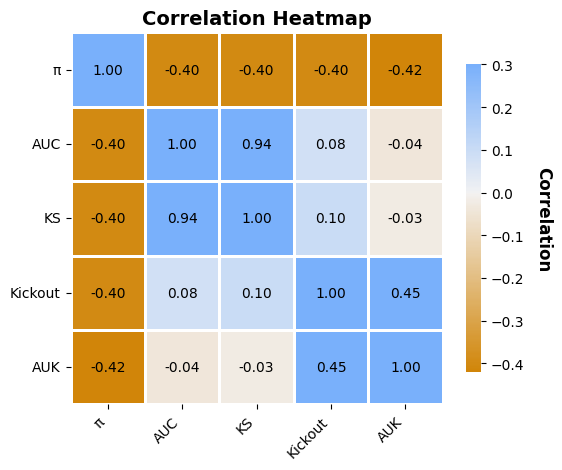

In [33]:
mask = np.tri(*corr.shape, k=-1, dtype=bool)
# Set up the matplotlib figure
plt.figure(figsize=(6, 5))  # Adjusted the size for better visibility

# Generate a custom diverging colormap with more appealing colors
cmap = sns.diverging_palette(44, 253, s=99, l=62, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.75, cbar_kws={"shrink": .8},
            annot=True, fmt=".2f", annot_kws={"size": 10, "color": "black"})

# Customize the color bar
cbar = plt.gcf().axes[-1]  # Get the colorbar axis
cbar.set_ylabel('Correlation', rotation=270, labelpad=20, weight='bold', size=12)
cbar.tick_params(labelsize=10)

# Adjust the title and labels for better presentation
plt.title('Correlation Heatmap', fontsize=14, weight='bold')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], labels=param_list, fontsize=10, rotation=45, ha='right')
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], labels=param_list, fontsize=10, rotation=0)

plt.savefig('corr-val-2010.png', dpi=300)

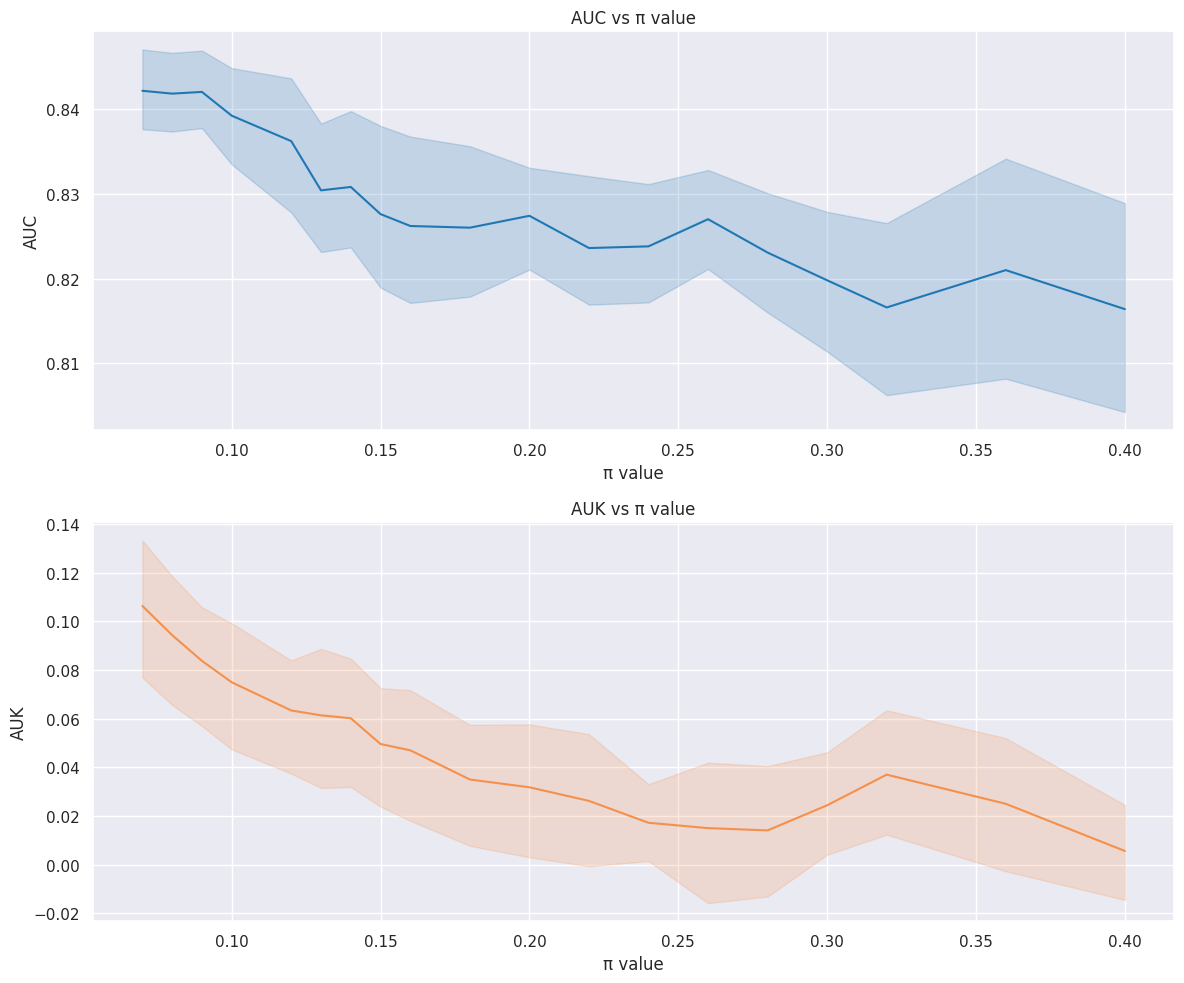

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Create a figure and axes array with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the AUC vs p_value on the first subplot with hue and style
sns.lineplot(
    data=results_df,
    x="p_value", y="AUC", color='#1f77b4',
    # hue="size", style="size",
    markers=True, dashes=False,
    ax=axs[0]
)
axs[0].set_title('AUC vs π value')
axs[0].set_xlabel('π value')
axs[0].set_ylabel('AUC')

# Plot the AUK vs p_value on the second subplot with hue and style
sns.lineplot(
    data=results_df,
    x="p_value", y="AUK",color='#f5904c',
    # hue="size", style="size",
    markers=True, dashes=False,
    ax=axs[1]
)
axs[1].set_title('AUK vs π value')
axs[1].set_xlabel('π value')
axs[1].set_ylabel('AUK')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the figure with a specified DPI
plt.savefig('metrics_by_p.png', dpi=300)


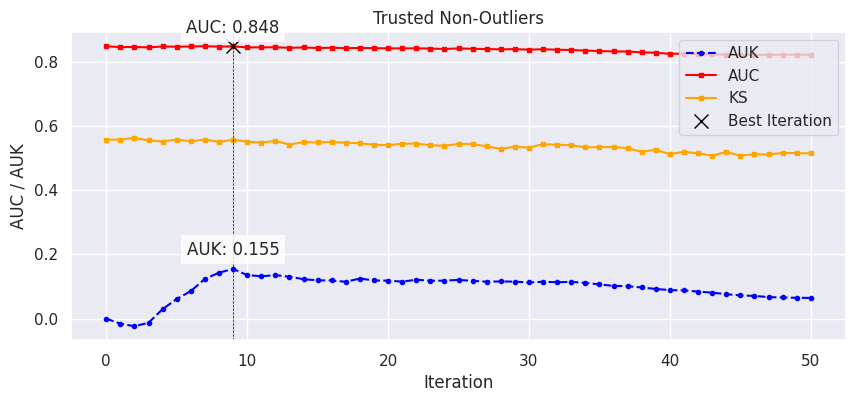

In [35]:

# Plot the AUC and kickout rate for each iteration of TN.
fig, axs = plt.subplots(1, 1, figsize=(10, 4))

# Plot the AUC and kickout rate for each iteration of TN (ex)
y_tn = np.arange(len(df_kick_ex.keys())) # type: ignore
axs.plot(y_tn, df_kick_ex.mean(), color='blue', linestyle='--', marker='o', markersize=3, label='AUK') # type: ignore
axs.plot(y_tn, df_auc_ex, color='red', linestyle='-', marker='s', markersize=3, label='AUC') # type: ignore
axs.plot(y_tn, df_ks_ex, color='orange', linestyle='-', marker='s', markersize=3, label='KS') # type: ignore
axs.plot(output_ex, best_values_ex[0], color='black', linestyle='', marker='x', markersize=10, label='Best Iteration')
axs.axvline(x=output_ex, color='black', linestyle='--', linewidth=0.5)
axs.set_title('Trusted Non-Outliers')
axs.set_xlabel('Iteration')
axs.set_ylabel('AUC / AUK')
# axs.set_ylim(0.8, 0.9)
# Annotate the best values above the points
best_auc = best_values_ex[0]
best_auk = best_values_ex[1]

# Adding text annotations with white background
axs.annotate(f'AUC: {best_auc:.3f}', 
             (output_ex, best_values_ex[0]), 
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

axs.annotate(f'AUK: {best_auk:.3f}', 
             (output_ex, best_values_ex[1]), 
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs.legend()

In [36]:
best_values_ex

array([0.848, 0.155, 9.   ])

#old $\alpha$

In [37]:
datapath_ex = os.path.join(ri_datasets_path,f'Data/TN-{year}/{seed_number}/{size}-{p_value}-{contamination_threshold}.parquet')

In [38]:
data_ex = pd.read_parquet(datapath_ex)

In [39]:
data_ex

,first_it,label
index,,
103272,-1,-1
157866,-1,-1
103357,-1,-1
103370,-1,-1
157826,-1,-1
...,...,...
160028,50,0
93488,50,0
132961,50,0


In [40]:
os.path.join(ri_datasets_path,f'Data/Load/{seed_number}_{year}')

'../data/riData/Data/Load/388389_2010'

In [41]:
ls '../data/riData/Load'

120054_2009/  302461_2010/  388391_2012/  907360_2009/  938872_2011/
120055_2010/  302462/       388392_2013/  907361_2010/  938873_2012/
120056_2011/  302463_2010/  570334_2009/  907362_2011/  942024_2009/
120057_2012/  388388_2009/  570335_2010/  907363_2012/
302461/       388389_2010/  570336_2011/  938870_2009/
302461_2009/  388390_2011/  570337_2012/  938871_2010/


In [42]:
data_ex.loc[data_ex.first_it == 0,'label']

index
1638673    0
1638678    0
1638688    0
1639341    1
1638683    0
          ..
1641826    0
1641560    0
1652525    0
1641605    1
1641691    0
Name: label, Length: 6122, dtype: int64

In [43]:
load_path = os.path.join(ri_datasets_path, f'Load/{seed_number}_{year}')

if Path(f'{load_path}').exists():# and False:
        df_train = pd.read_csv(f'{load_path}/A_train.csv', index_col=0)
        df_val = pd.read_csv(f'{load_path}/A_val.csv', index_col=0)
        df_test = pd.read_csv(f'{load_path}/A_test.csv', index_col=0)
        R_train = pd.read_csv(f'{load_path}/R_train.csv', index_col=0)
        R_val = pd.read_csv(f'{load_path}/R_val.csv', index_col=0)
        R_test = pd.read_csv(f'{load_path}/R_test.csv', index_col=0)
        X_train = df_train.loc[:, df_train.columns != "target"]
        y_train = df_train["target"]
        X_val = df_val.loc[:, df_val.columns != "target"]
        y_val = df_val["target"]
        X_test = df_test.loc[:, df_test.columns != "target"]
        y_test = df_test["target"]

In [44]:
iteration = 50

datapath_ex = os.path.join(ri_datasets_path, f'Data/TN-{year}/{seed_number}/{size}-{p_value}-{contamination_threshold}.parquet')
parquet_df = pd.read_parquet(datapath_ex)

train_i = parquet_df.loc[(data_ex.first_it <= iteration) & (data_ex.first_it >=0) ,:]
rej_left = parquet_df.loc[(data_ex.first_it==-1) ,:]
first_added = R_train.loc[R_train.index.intersection(train_i.index),:]

not_added = parquet_df.loc[(data_ex.first_it==-1) ,:]
df_left = R_train.loc[R_train.index.intersection(not_added.index),:]
df_left = pd.concat([df_left, rej_left], axis=1)

df_i = pd.concat([X_train, first_added], axis=0)
df_i = pd.concat([df_i, train_i], axis=1)

assert df_i.shape[0] == (X_train.shape[0] + first_added.shape[0])

#avoid

In [45]:
df_all = pd.concat([df_i, df_left], axis=0)
X_all = df_all.loc[:, (df_all.columns != "first_it") & (df_all.columns != "label")]
y_all = df_all["label"]
Z_all = df_all["first_it"]
X_all_train = X_all.loc[Z_all == 0, :]
y_all_train = y_all.loc[Z_all == 0]
X_all_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6122 entries, 1651966 to 1637823
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   emp_length      6122 non-null   float64
 1   addr_state      6122 non-null   float64
 2   dti             6122 non-null   float64
 3   loan_amnt       6122 non-null   float64
 4   risk_score      6122 non-null   float64
 5   int_rate        6122 non-null   float64
 6   delinq_2yrs     6122 non-null   float64
 7   annual_inc      6122 non-null   float64
 8   inq_last_6mths  6122 non-null   float64
 9   term            6122 non-null   float64
 10  home_ownership  6122 non-null   float64
 11  revol_util      6122 non-null   float64
dtypes: float64(12)
memory usage: 621.8 KB


In [46]:
pca_pipe = tr.create_pipeline(X_all_train, y_all_train, 
            PCA(n_components=2, random_state = seed_number), )
pca_pipe.fit(X_all_train, y_all_train)
X_pca = pca_pipe.transform(X_all)
X_pca = pd.DataFrame(X_pca, columns = ['Pc1', 'Pc2'], index=X_all.index)

finalDf = pd.concat([X_pca, df_all.loc[:, ['first_it', 'label']]], axis = 1)

In [47]:
finalDf['labeled'] = finalDf['first_it'].apply(lambda x: False if x != 0 else True)

In [48]:
finalDf.first_it.max()

50

In [49]:
# focus on evolution of auc by iteration of ci-ex

In [ ]:
def check_labels(df, it):
    """
    first define the labeled column based on the first_it column
    if first_it is -1, then the row is not labeled
    if first_it is 0, then the row is labeled
    if first_it is > 0, then the row is labeled if the current iteration is less than or equal to the first_it
    and not labeled otherwise
    """
    df_it = df.copy()
    df_it.loc[(df_it['first_it'] <= it) & (df_it['first_it'] != -1), 'labeled'] = True
    df_it.loc[~((df_it['first_it'] <= it) & (df_it['first_it'] != -1)), 'labeled'] = False
    
    #then define the current_it column
    df_it.loc[:, 'current_it'] = it
    return df_it

check_labels(finalDf, 50)

,Pc1,Pc2,first_it,label,labeled,current_it
1651966,2.754849,-0.004852,0,1,True,50
1642601,-2.063641,-0.586580,0,0,True,50
1643153,1.026603,0.029206,0,0,True,50
1643380,0.441833,0.790824,0,0,True,50
1644529,-1.556097,-0.080850,0,0,True,50
...,...,...,...,...,...,...
99031,2.393460,-1.306072,-1,-1,False,50
120499,2.287681,0.208163,-1,-1,False,50
112955,-0.728402,3.210677,-1,-1,False,50
96739,2.623160,-0.056013,-1,-1,False,50


,Pc1,Pc2,first_it,label,labeled,current_it
1651966,2.754849,-0.004852,0,1,True,50
1642601,-2.063641,-0.586580,0,0,True,50
1643153,1.026603,0.029206,0,0,True,50
1643380,0.441833,0.790824,0,0,True,50
1644529,-1.556097,-0.080850,0,0,True,50
...,...,...,...,...,...,...
99031,2.393460,-1.306072,-1,-1,False,50
120499,2.287681,0.208163,-1,-1,False,50
112955,-0.728402,3.210677,-1,-1,False,50
96739,2.623160,-0.056013,-1,-1,False,50


In [ ]:
check_labels(finalDf, 2).query('first_it == 50')

,Pc1,Pc2,first_it,label,labeled,current_it
109168,1.056342,0.308373,50,0,False,2
119766,0.595492,-1.878048,50,1,False,2
163592,0.760237,-1.314043,50,0,False,2
125312,2.250942,0.120484,50,0,False,2
147508,1.065907,0.702564,50,0,False,2
...,...,...,...,...,...,...
99904,1.512870,0.151730,50,0,False,2
143373,1.007975,-0.715206,50,0,False,2
144109,1.227661,0.267386,50,0,False,2
150300,0.367198,-1.257605,50,0,False,2


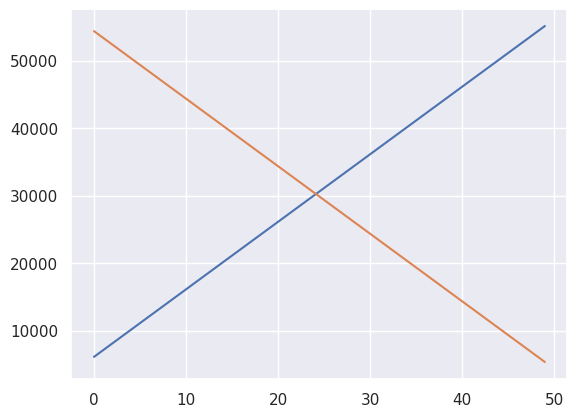

In [ ]:
l_dict = {}
for i in range(0, 50):
    temp_df = check_labels(finalDf, i)
    kt = temp_df.loc[temp_df['labeled'] == True, 'labeled'].sum()
    kf = temp_df.shape[0] - kt
    l_dict[i] = {'labeled': kt, 'unlabeled': kf}
l_df = pd.DataFrame(l_dict)
plt.plot(l_df.T)

In [ ]:
df_all

,emp_length,addr_state,dti,loan_amnt,risk_score,int_rate,delinq_2yrs,annual_inc,inq_last_6mths,term,home_ownership,revol_util,first_it,label
1651966,1.0,0.146791,11.36,15200.0,622.0,16.820,0.0,30000.0,4.0,60.0,0.126405,91.40,0,1
1642601,1.0,0.132320,18.83,7000.0,762.0,7.510,0.0,110000.0,1.0,36.0,0.150919,2.30,0,0
1643153,3.0,0.150803,22.43,15000.0,687.0,13.110,0.0,80000.0,0.0,36.0,0.126405,87.30,0,0
1643380,10.0,0.103260,12.03,16000.0,712.0,12.730,0.0,110000.0,0.0,36.0,0.156227,82.60,0,0
1644529,8.0,0.150803,7.06,5000.0,787.0,10.620,0.0,25000.0,3.0,36.0,0.150919,19.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99031,6.0,0.146791,65.04,1000.0,726.0,15.270,0.5,36000.0,5.5,36.0,0.139241,33.55,-1,-1
120499,0.0,0.126354,21.74,25000.0,619.0,16.510,0.0,67500.0,0.5,48.0,0.139241,67.90,-1,-1
112955,10.0,0.150739,3.12,25000.0,790.0,12.365,1.0,189374.0,0.0,48.0,0.139241,4.35,-1,-1
96739,8.0,0.206711,41.59,10000.0,647.0,15.455,0.5,71000.0,2.5,48.0,0.139241,61.30,-1,-1


In [ ]:
check_labels(df_all, 50)

,emp_length,addr_state,dti,loan_amnt,risk_score,int_rate,delinq_2yrs,annual_inc,inq_last_6mths,term,home_ownership,revol_util,first_it,label,labeled,current_it
1651966,1.0,0.146791,11.36,15200.0,622.0,16.820,0.0,30000.0,4.0,60.0,0.126405,91.40,0,1,True,50
1642601,1.0,0.132320,18.83,7000.0,762.0,7.510,0.0,110000.0,1.0,36.0,0.150919,2.30,0,0,True,50
1643153,3.0,0.150803,22.43,15000.0,687.0,13.110,0.0,80000.0,0.0,36.0,0.126405,87.30,0,0,True,50
1643380,10.0,0.103260,12.03,16000.0,712.0,12.730,0.0,110000.0,0.0,36.0,0.156227,82.60,0,0,True,50
1644529,8.0,0.150803,7.06,5000.0,787.0,10.620,0.0,25000.0,3.0,36.0,0.150919,19.40,0,0,True,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99031,6.0,0.146791,65.04,1000.0,726.0,15.270,0.5,36000.0,5.5,36.0,0.139241,33.55,-1,-1,False,50
120499,0.0,0.126354,21.74,25000.0,619.0,16.510,0.0,67500.0,0.5,48.0,0.139241,67.90,-1,-1,False,50
112955,10.0,0.150739,3.12,25000.0,790.0,12.365,1.0,189374.0,0.0,48.0,0.139241,4.35,-1,-1,False,50
96739,8.0,0.206711,41.59,10000.0,647.0,15.455,0.5,71000.0,2.5,48.0,0.139241,61.30,-1,-1,False,50


In [ ]:
def check_outliers(dfall, number, it, contamination_threshold=0.12, seed_number=seed_number):
    # Set parameters for the IsolationForest
    iso_params = {"contamination": contamination_threshold, "random_state": seed_number}
    # Create a copy of the input DataFrame to avoid modifying the original data
    df_o = dfall.copy()
    # List of columns to exclude from the analysis
    exclude_cols = ['first_it', 'label', 'labeled', 'current_it']
    # Get the current DataFrame based on the iteration number
    currentDF = check_labels(df_o, it)
    # Select the training data: rows where 'first_it' is less than the iteration number and not equal to -1
    X_train = currentDF.loc[(currentDF['first_it'] < it) & (currentDF['first_it'] != -1),
                            [col for col in currentDF.columns if col not in exclude_cols]]

    # Select the labels for the training data
    y_train = currentDF.loc[(currentDF['first_it'] < it) & (currentDF['first_it'] != -1), 'label']
    # Select the unlabeled data: rows where 'first_it' is -1 or greater than or equal to the iteration number
    X_unl = currentDF.loc[(currentDF['first_it'] == -1) | (currentDF['first_it'] >= it),
                          [col for col in currentDF.columns if col not in exclude_cols]]
    # Initialize and fit the IsolationForest on the training data with the specified label
    iso = tr.create_pipeline(X_train[y_train == number], y_train[y_train == number],
                                                IsolationForest(**iso_params), do_EBE=True, crit = 0)
    # dex.get_shapes(X_train, y_train, X_unl, df_o)
    iso.fit(X_train[y_train == number], y_train[y_train == number])
    # Predict outliers in the unlabeled data
    unl_scores = iso.predict(X_unl)
    # Assign outlier flags to the unlabeled data indices
    currentDF.loc[X_unl.index, f'outlier_{number}'] = unl_scores
    # Assign outlier flag 0 to the training data indices (assuming no outliers in the training data)
    currentDF.loc[X_train.index, f'outlier_{number}'] = 0
    # Convert the outlier flags to integer type
    currentDF[f'outlier_{number}'] = currentDF[f'outlier_{number}'].astype(int)
    # Return the modified DataFrame
    return currentDF


In [ ]:
df_all.query('first_it <= 2 & first_it >= 0')

,emp_length,addr_state,dti,loan_amnt,risk_score,int_rate,delinq_2yrs,annual_inc,inq_last_6mths,term,home_ownership,revol_util,first_it,label
1651966,1.0,0.146791,11.36,15200.0,622.0,16.820,0.0,30000.0,4.0,60.0,0.126405,91.40,0,1
1642601,1.0,0.132320,18.83,7000.0,762.0,7.510,0.0,110000.0,1.0,36.0,0.150919,2.30,0,0
1643153,3.0,0.150803,22.43,15000.0,687.0,13.110,0.0,80000.0,0.0,36.0,0.126405,87.30,0,0
1643380,10.0,0.103260,12.03,16000.0,712.0,12.730,0.0,110000.0,0.0,36.0,0.156227,82.60,0,0
1644529,8.0,0.150803,7.06,5000.0,787.0,10.620,0.0,25000.0,3.0,36.0,0.150919,19.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95552,2.0,0.200854,2.15,25000.0,753.0,11.305,0.0,75000.0,1.0,36.0,0.139241,26.20,2,0
98929,3.0,0.146791,-1.00,20000.0,774.5,9.500,0.0,200000.0,0.0,36.0,0.139241,8.55,2,0
156861,0.0,0.126354,9.06,10000.0,752.0,9.065,0.0,61000.0,1.5,36.0,0.139241,29.20,2,0
153929,0.0,0.235007,3.69,2000.0,473.0,15.765,0.0,24000.0,4.5,48.0,0.139241,56.50,2,1


In [ ]:
# check_outliers(df_all, 0, 3)

In [ ]:
def set_current_df(finaldf, dfall, it):
    # Assume check_labels and check_outliers are already defined elsewhere
    currentDF = check_labels(finaldf, it)
    
    # Get the boolean masks for outliers
    outPos_mask = check_outliers(dfall, 1, it).loc[:, 'outlier_1']
    outNeg_mask = check_outliers(dfall, 0, it).loc[:, 'outlier_0']
    
    # Set 'outPos' column based on the mask
    currentDF['outPos'] = outPos_mask
    
    # Set 'outNeg' column based on the mask
    currentDF['outNeg'] = outNeg_mask
    
    return currentDF
    

In [ ]:
# .loc[:,['outPos', 'outNeg']]

In [ ]:
# set_current_df(finalDf, df_all, 50).query('outPos == -1 and outNeg == -1').first_it.value_counts()

In [ ]:
finalDf.first_it.value_counts()

first_it
 0     6122
-1     4814
 18    1000
 38    1000
 22    1000
 42    1000
 46    1000
 16    1000
 13    1000
 1     1000
 11    1000
 15    1000
 9     1000
 41    1000
 43    1000
 21    1000
 33    1000
 2     1000
 3     1000
 27    1000
 37    1000
 26    1000
 23    1000
 35    1000
 5     1000
 32    1000
 36    1000
 45    1000
 20    1000
 17    1000
 39    1000
 4     1000
 44    1000
 25    1000
 47    1000
 31    1000
 8     1000
 29    1000
 6     1000
 14    1000
 7     1000
 28    1000
 34    1000
 40    1000
 49    1000
 24    1000
 19    1000
 48    1000
 30    1000
 12    1000
 10    1000
 50     549
Name: count, dtype: int64

In [ ]:
# set_current_df(finalDf, df_all,4).query('first_it == 4').query('outPos == -1 & outNeg == -1')

In [ ]:
# for n in range(1, 11):
#     aux = set_current_df(finalDf, df_all,n).query('first_it ==@n & (outPos == 1 | outNeg == 1)').shape[0]
#     print(f'iteration {n} has {aux} added rows')

In [ ]:
# for it in range(1,51):
#     print(f'iteration {it}')
#     print(check_outliers(df_all, finalDf, 0, it).shape)

In [ ]:
# finalDf = finalDf.loc[(finalDf['Pc1'] < 100) & (finalDf['Pc2'] < 100),:]
# finalDf

In [ ]:
# range_it = range(1, finalDf['first_it'].max()+1, 5)
# N = len(range_it)

# # Calculate the number of rows and columns needed for the grid
# n_cols = 5
# n_rows = math.ceil(N / n_cols)

# sns.set_theme(style="ticks")
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust the figure size dynamically

# # Flatten the axs array for easy iteration if there are multiple rows
# axs = axs.flatten()

# pallet_label = {-1: 'red', 0: 'blue', 1: 'green'}
# alpha_label = {-1: 1, 0: 0, 1: 1}
# # pallet = {True: 'blue', False: 'red'}
# # alpha_values = {True: 1, False: 0.5}


# for idx, it in enumerate(range_it):  # Loop through the number of unique first_its
#     filtered_data = set_current_df(finalDf, df_all, it)
#     ax = axs[idx]

#     for label_status in [-1,0,1]:
#         subset = filtered_data[filtered_data["label"] == label_status]
#         sns.scatterplot(
#             x="Pc1", y="Pc2", 
#             data=subset,
#             s=5, 
#             color=pallet_label[label_status], 
#             alpha=alpha_label[label_status],
#             label=label_status,
#             ax=ax,
#             legend=True,
#         )

#     ax.set_title(f'Group {it}', fontsize=8)
#     ax.set_ylim([-10, 6])
#     ax.set_xlim([-4, 25])

# # Turn off the axes for any remaining empty subplots
# for j in range(it, n_rows * n_cols):
#     fig.delaxes(axs[j])
# plt.tight_layout()
# plt.savefig(f'scatter-pca-{seed_number}-{year}-{size}-{p_value}-{contamination_threshold}.png')
# # plt.show()


In [ ]:
# range_it = range(1, finalDf['first_it'].max()+1, 5)
# N = len(range_it)

# # Calculate the number of rows and columns needed for the grid
# n_cols = 5
# n_rows = math.ceil(N / n_cols)

# sns.set_theme(style="ticks")
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust the figure size dynamically

# # Flatten the axs array for easy iteration if there are multiple rows
# axs = axs.flatten()

# pallet_out = {-1: 'red', 0: 'blue', 1: 'green'}
# alpha_out = {-1: 1, 0: 0, 1: 1}
# pallet = {True: 'blue', False: 'red'}
# alpha_values = {True: 1, False: 0.5}


# for idx, it in enumerate(range_it):  # Loop through the number of unique first_its
#     filtered_data = set_current_df(finalDf, df_all, it)
#     ax = axs[idx]

#     for out_status in [-1,0,1]:
#         subset = filtered_data[filtered_data["outPos"] == out_status]
#         sns.scatterplot(
#             x="Pc1", y="Pc2", 
#             data=subset,
#             s=5, 
#             color=pallet_out[out_status], 
#             alpha=alpha_out[out_status],
#             label=out_status,
#             ax=ax,
#             legend=True,
#         )

#     ax.set_title(f'Group {it}', fontsize=8)
#     ax.set_ylim([-10, 6])
#     ax.set_xlim([-4, 25])

# # Turn off the axes for any remaining empty subplots
# for j in range(it, n_rows * n_cols):
#     fig.delaxes(axs[j])


# plt.tight_layout()
# # plt.savefig(f'scatter-pca-{seed_number}-{year}-{size}-{p_value}-{contamination_threshold}.png')
# # plt.show()


In [ ]:
# range_it = range(1, finalDf['first_it'].max()+1, 5)
# N = len(range_it)

# # Calculate the number of rows and columns needed for the grid
# n_cols = 5
# n_rows = math.ceil(N / n_cols)

# sns.set_theme(style="ticks")
# fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust the figure size dynamically

# # Flatten the axs array for easy iteration if there are multiple rows
# axs = axs.flatten()

# pallet_out = {-1: 'red', 0: 'blue', 1: 'green'}
# alpha_out = {-1: 1, 0: 1, 1: 1}
# pallet = {True: 'blue', False: 'red'}
# alpha_values = {True: 1, False: 0.5}


# for idx, it in enumerate(range_it):  # Loop through the number of unique first_its
#     filtered_data = set_current_df(finalDf, df_all, it)
#     ax = axs[idx]

#     for out_status in [-1,0,1]:
#         subset = filtered_data[filtered_data["outNeg"] == out_status]
#         sns.scatterplot(
#             x="Pc1", y="Pc2", 
#             data=subset,
#             s=5, 
#             color=pallet_out[out_status], 
#             alpha=alpha_out[out_status],
#             label=out_status,
#             ax=ax,
#             legend=True,
#         )

#     ax.set_title(f'Group {it}', fontsize=8)
#     ax.set_ylim([-10, 6])
#     ax.set_xlim([-4, 25])

# # Turn off the axes for any remaining empty subplots
# for j in range(it, n_rows * n_cols):
#     fig.delaxes(axs[j])


# plt.tight_layout()
# # plt.savefig(f'scatter-pca-{seed_number}-{year}-{size}-{p_value}-{contamination_threshold}.png')
# # plt.show()


In [ ]:
finalDfkde = finalDf.loc[(finalDf['Pc1'] < 100) & (finalDf['Pc2'] < 100),:]
df_all_kde = df_all.loc[(finalDf['Pc1'] < 100) & (finalDf['Pc2'] < 100),:]
finalDfkde

,Pc1,Pc2,first_it,label,labeled
1651966,2.754849,-0.004852,0,1,True
1642601,-2.063641,-0.586580,0,0,True
1643153,1.026603,0.029206,0,0,True
1643380,0.441833,0.790824,0,0,True
1644529,-1.556097,-0.080850,0,0,True
...,...,...,...,...,...
99031,2.393460,-1.306072,-1,-1,False
120499,2.287681,0.208163,-1,-1,False
112955,-0.728402,3.210677,-1,-1,False
96739,2.623160,-0.056013,-1,-1,False


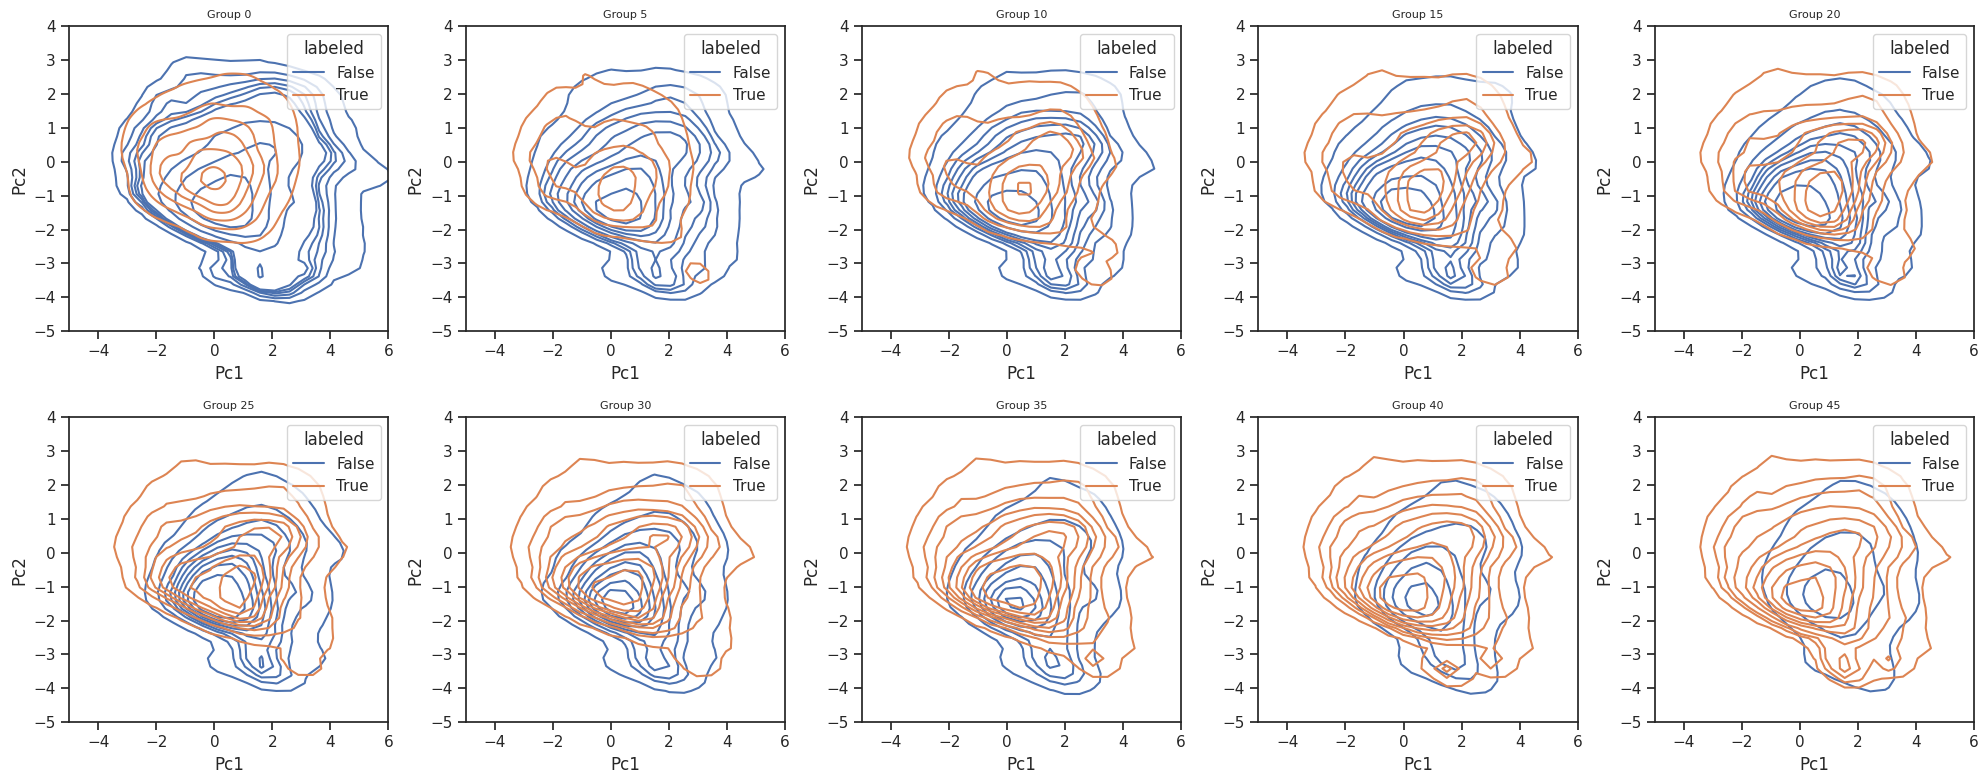

In [ ]:
range_it = range(0, finalDfkde['first_it'].max(), 5)
N = len(range_it)

# Calculate the number of rows and columns needed for the grid
n_cols = 5
n_rows = math.ceil(N / n_cols)

sns.set_theme(style="ticks")
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust the figure size dynamically

# Flatten the axs array for easy iteration if there are multiple rows
axs = axs.flatten()

# pallet = {'labeled': 'blue', 'unlabelled': 'red'}
pallet = {True: 'blue', False: 'red'}
alpha_values = {True: 1, False: 0}

kde_list = []

for idx, it in enumerate(range_it):  # Loop through the number of unique first_its
    filtered_data = check_labels(finalDfkde, it)
    ax = axs[idx]

    g = sns.kdeplot(
        x="Pc1", y="Pc2", 
        data=filtered_data,
        hue='labeled',
        fill=False,
        ax = ax,
    )

    kde_list.append(g)
    
    ax.set_title(f'Group {it}', fontsize=8)
    ax.set_ylim([-5, 4])
    ax.set_xlim([-5, 6])

# Turn off the axes for any remaining empty subplots
for j in range(it, n_rows * n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()

plt.savefig(f'kde-pca_lines-{seed_number}-{year}-{size}-{p_value}-{contamination_threshold}.png')
# plt.show()


/home/athyrson/HIAAC/credit_pipeline/playground_credit/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
/home/athyrson/HIAAC/credit_pipeline/playground_credit/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
/home/athyrson/HIAAC/credit_pipeline/playground_credit/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
/home/athyrson/HIAAC/credit_pipeline/playground_credit/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 's'
  cset = contour_func(
/home/athyrson/HIAAC/credit_pipeline/playground_credit/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 's'
  cset = cont

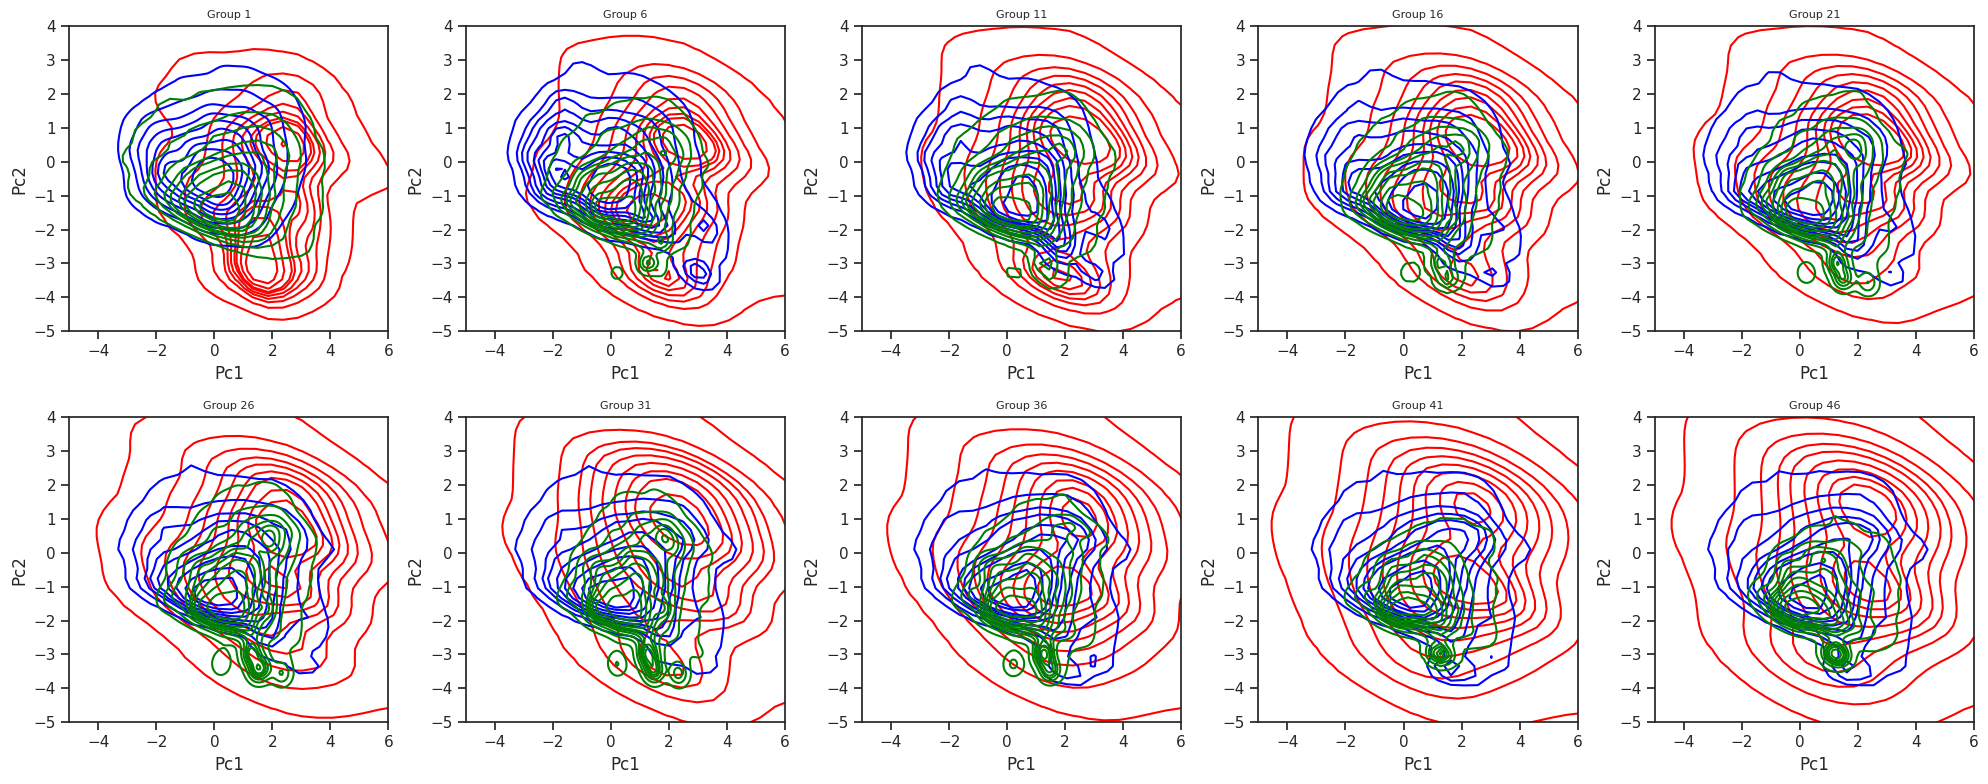

In [ ]:
range_it = range(1, finalDfkde['first_it'].max()+1, 5)
N = len(range_it)

# Calculate the number of rows and columns needed for the grid
n_cols = 5
n_rows = math.ceil(N / n_cols)

sns.set_theme(style="ticks")
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust the figure size dynamically

# Flatten the axs array for easy iteration if there are multiple rows
axs = axs.flatten()

# pallet = {'labeled': 'blue', 'unlabelled': 'red'}
pallet = {True: 'blue', False: 'red'}
alpha_values = {True: 1, False: 0}

kde_list = []

for idx, it in enumerate(range_it):  # Loop through the number of unique first_its
    filtered_data = set_current_df(finalDfkde, df_all_kde, it)
    ax = axs[idx]

    for out_status in [-1,0,1]:
        subset = filtered_data[filtered_data["outNeg"] == out_status]
        
        sns.kdeplot(
            x="Pc1", y="Pc2", 
            data=subset,
            s=5, 
            color=pallet_out[out_status], 
            label=out_status,
            ax=ax,
            fill=False,
            legend=True,
        )

    # g = sns.kdeplot(
    #     x="Pc1", y="Pc2", 
    #     data=filtered_data,
    #     hue='labeled',
    #     fill=False,
    #     ax = ax,
    # )
    
    ax.set_title(f'Group {it}', fontsize=8)
    ax.set_ylim([-5, 4])
    ax.set_xlim([-5, 6])

# Turn off the axes for any remaining empty subplots
for j in range(it, n_rows * n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()

plt.savefig(f'kde-pca_lines-{seed_number}-{year}-{size}-{p_value}-{contamination_threshold}.png')
# plt.show()


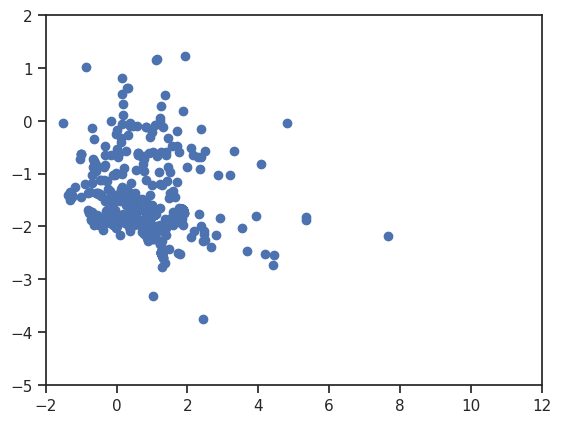

In [ ]:
from IPython.display import clear_output

for i in range(50):
    clear_output(wait=True)
    x = finalDf.loc[finalDf['first_it'] == i, 'Pc1']
    y = finalDf.loc[finalDf['first_it'] == i, 'Pc2']
    plt.scatter(x=x, y=y)
    plt.xlim(-2, 12)  # Set x-axis limits
    plt.ylim(-5, 2)  # Set y-axis limits
    plt.show()
    plt.pause(0.5) 

In [ ]:
#plotar added, acp, and outliers

In [ ]:
sns.relplot(
    data=finalDf.query("first_it <= 10"),
    x="Pc1", y="Pc2", col="first_it", hue="rej",
    kind="scatter", s=5, palette="Set1",
    col_wrap=5  # Adjust this number based on how many columns you want per row
)

# Adjust the layout
plt.tight_layout()

# Show the plot
# plt.show()

In [ ]:
it_mean = {}
for it in range(df_i.first_it.max()):
    cols_mean = {}
    df_it  = df_i.loc[(df_i.first_it <= it) & (df_i.first_it >= 0),:]
    for c in df_i.columns:
        cols_mean[c] = df_it.loc[:,c].mean()
    it_mean[it] = cols_mean

In [ ]:
mean_df = pd.DataFrame(it_mean).drop(['addr_state', 'term', 'first_it']).T
mean_df

,emp_length,dti,loan_amnt,risk_score,int_rate,delinq_2yrs,annual_inc,inq_last_6mths,home_ownership,revol_util,label
0,4.908282,13.053928,10423.440052,684.759229,12.278685,0.146031,69280.201121,1.181313,0.140756,48.081940,0.141294
1,4.528503,126.104664,10317.772676,683.723814,12.113692,0.132687,69022.601475,1.199172,0.140543,45.858717,0.160769
2,4.202536,112.530254,10452.959739,677.394946,12.067570,0.122999,68918.791261,1.198966,0.140383,44.981460,0.175449
3,4.019458,123.563835,10481.400899,666.084603,12.071005,0.119162,69232.173307,1.187514,0.140258,44.669489,0.186911
4,3.902984,261.420903,10566.449516,658.422249,12.097833,0.116380,70549.505480,1.175459,0.140157,44.527153,0.196107
5,3.774411,330.467827,10626.207687,655.680521,12.152392,0.118009,70131.309189,1.163280,0.140075,45.058855,0.203650
6,3.631414,356.180267,10614.333187,653.657874,12.190749,0.117101,69389.085949,1.162143,0.140006,45.456987,0.209949
7,3.513374,415.783724,10554.467461,648.966488,12.222966,0.113512,68490.878140,1.171049,0.139948,45.816169,0.215287
8,3.398102,411.030668,10593.163222,647.968878,12.264856,0.113475,68206.429785,1.176108,0.139898,46.409791,0.219870
9,3.301647,386.116668,10592.590333,638.594300,12.251638,0.110435,67703.011106,1.167306,0.139854,46.566031,0.223846


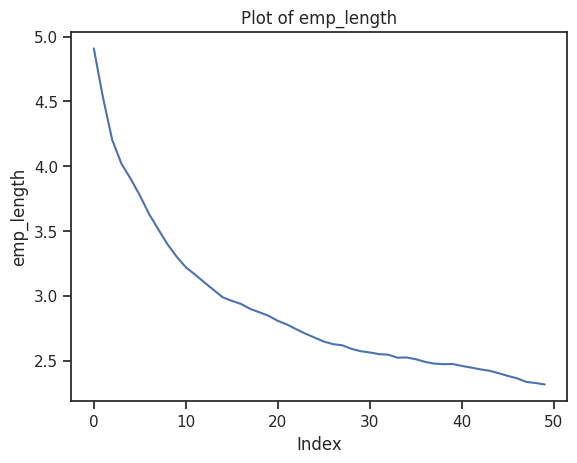

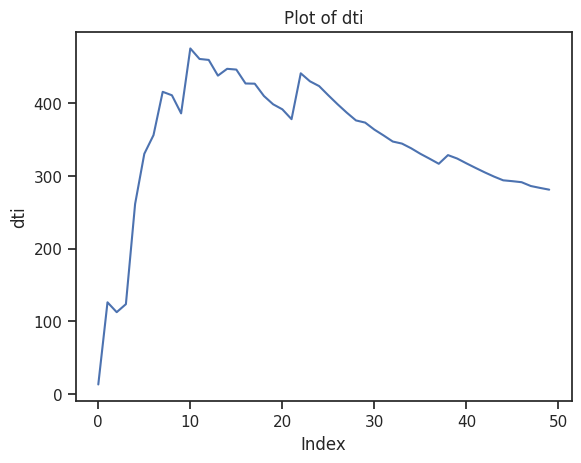

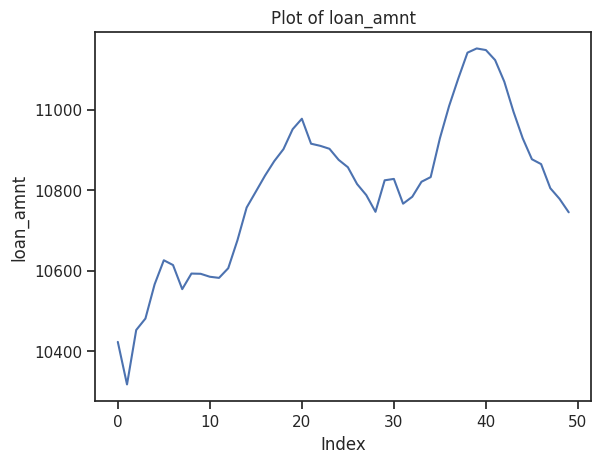

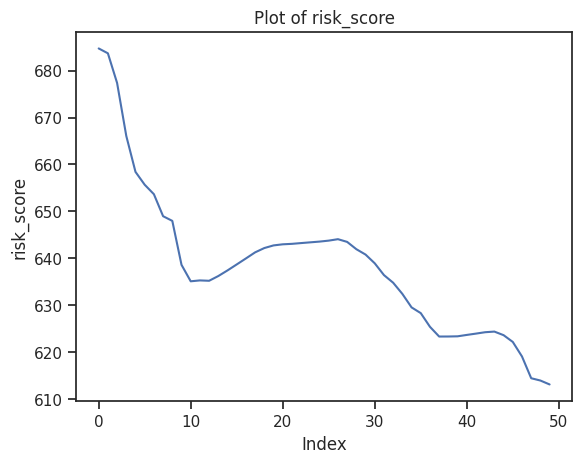

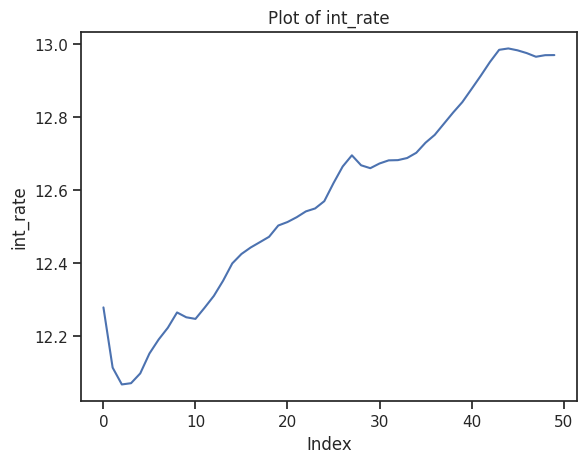

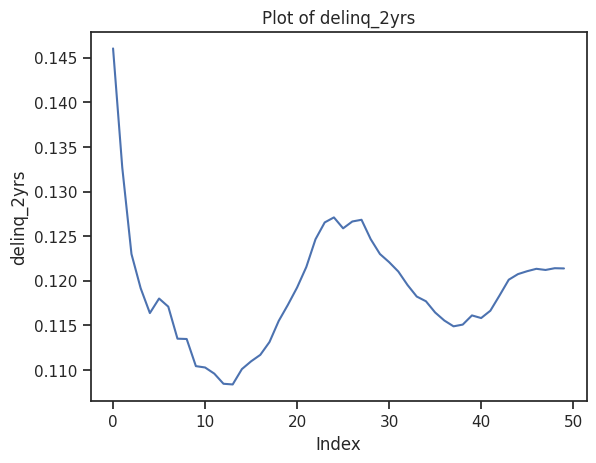

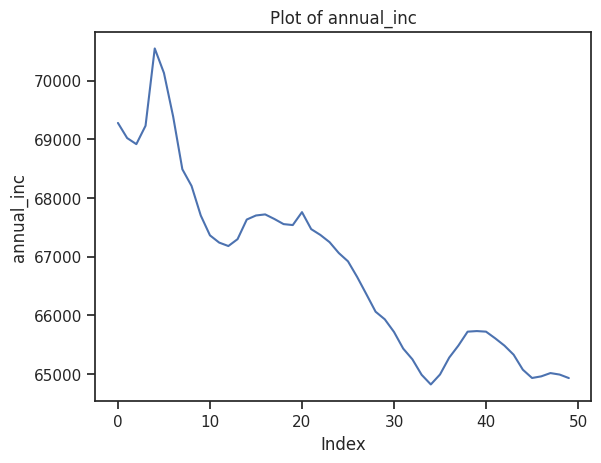

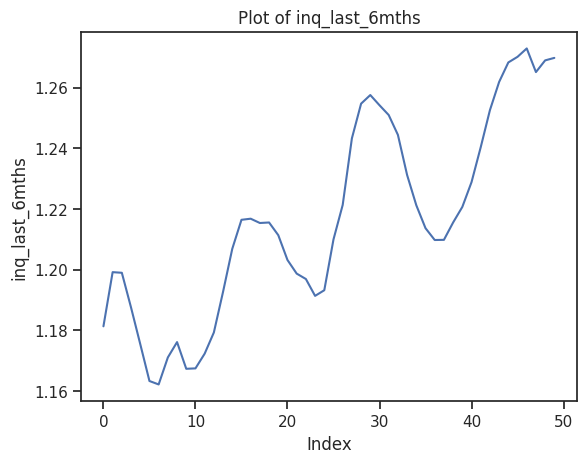

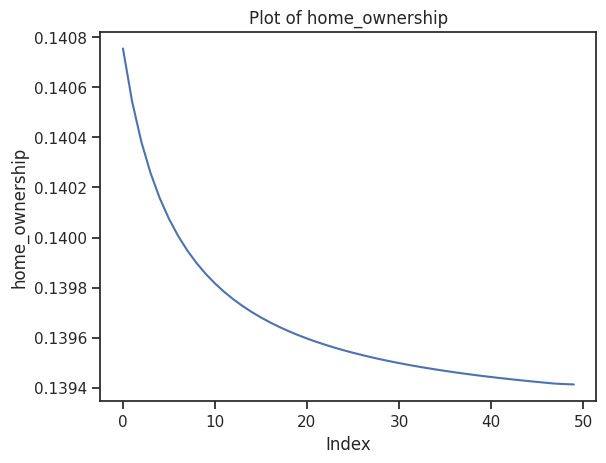

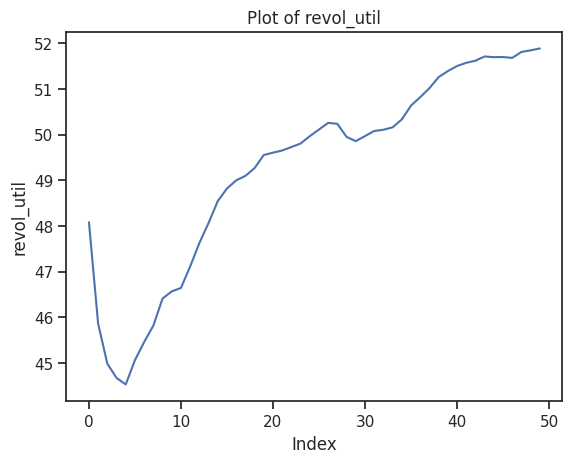

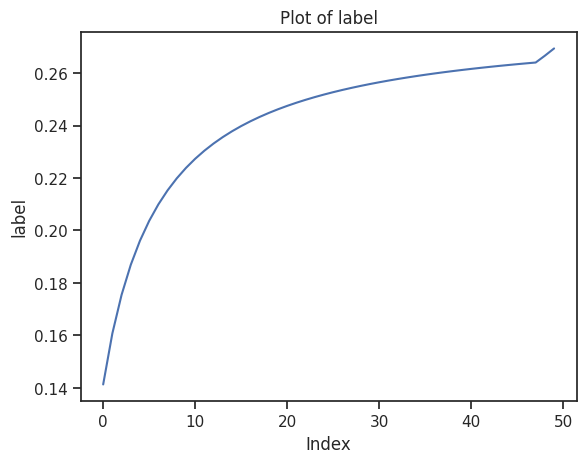

In [ ]:
for column in mean_df.columns:
    plt.figure()  # Create a new figure for each plot
    plt.plot(mean_df[column])  # Plot the column data
    plt.title(f'Plot of {column}')  # Title with the name of the column
    plt.xlabel('Index')  # X-axis label, adjust if your index has specific meaning, e.g., 'Time' or 'Date'
    plt.ylabel(column)  # Y-axis label using the column name

    # Display the plot
    plt.show()


#about ci-ex

In [ ]:
models_ex = os.path.join(ri_datasets_path,f'Models/TN-{year}/{seed_number}/{size}-{p_value}-{contamination_threshold}.joblib')
models_ex

'../data/riData/Models/TN-2010/388389/1000-0.28-0.12.joblib'

In [ ]:
ci_ex = joblib.load(models_ex)

In [ ]:
ci_ex.keys()

dict_keys(['BM', 'TN_1', 'TN_2', 'TN_3', 'TN_4', 'TN_5', 'TN_6', 'TN_7', 'TN_8', 'TN_9', 'TN_10', 'TN_11', 'TN_12', 'TN_13', 'TN_14', 'TN_15', 'TN_16', 'TN_17', 'TN_18', 'TN_19', 'TN_20', 'TN_21', 'TN_22', 'TN_23', 'TN_24', 'TN_25', 'TN_26', 'TN_27', 'TN_28', 'TN_29', 'TN_30', 'TN_31', 'TN_32', 'TN_33', 'TN_34', 'TN_35', 'TN_36', 'TN_37', 'TN_38', 'TN_39', 'TN_40', 'TN_41', 'TN_42', 'TN_43', 'TN_44', 'TN_45', 'TN_46', 'TN_47', 'TN_48', 'TN_49', 'TN_50'])

In [ ]:
X_val

,emp_length,addr_state,dti,loan_amnt,risk_score,int_rate,delinq_2yrs,annual_inc,inq_last_6mths,term,home_ownership,revol_util
1642810,2.0,0.146791,13.40,25000.0,742.0,10.99,0.0,100000.00,1.0,36.0,0.150919,67.3
1643590,5.0,0.146707,22.62,25000.0,702.0,15.70,0.0,68902.67,0.0,36.0,0.126405,82.9
1642076,10.0,0.126354,24.38,16800.0,652.0,14.59,0.0,54000.00,3.0,36.0,0.126405,39.8
1652221,7.0,0.106176,19.45,5000.0,597.0,10.38,0.0,68000.00,4.0,36.0,0.126405,21.0
1639585,7.0,0.146791,13.20,5000.0,762.0,7.51,0.0,96000.00,0.0,36.0,0.126405,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1644240,2.0,0.150803,11.93,12000.0,802.0,7.88,0.0,32000.00,0.0,36.0,0.126405,27.0
1639242,5.0,0.118386,20.09,1000.0,712.0,7.88,0.0,54000.00,0.0,60.0,0.126405,32.1
1644047,10.0,0.119596,13.80,10000.0,752.0,13.48,0.0,41300.00,0.0,36.0,0.150919,74.2
1644806,10.0,0.119014,2.13,2500.0,592.0,13.92,1.0,82400.00,0.0,36.0,0.150919,0.0


In [ ]:
from sklearn.metrics import confusion_matrix

cm_dict = {}

for name, model in ci_ex.items():
    cm = confusion_matrix(y_val, model.predict(X_val))
    cm_dict[name] = cm
       

In [ ]:
cm_dict

{'BM': array([[1682,  575],
        [  70,  297]]),
 'TN_1': array([[1745,  512],
        [  84,  283]]),
 'TN_2': array([[1788,  469],
        [  91,  276]]),
 'TN_3': array([[1826,  431],
        [  97,  270]]),
 'TN_4': array([[1851,  406],
        [ 104,  263]]),
 'TN_5': array([[1877,  380],
        [ 108,  259]]),
 'TN_6': array([[1889,  368],
        [ 115,  252]]),
 'TN_7': array([[1902,  355],
        [ 120,  247]]),
 'TN_8': array([[1908,  349],
        [ 123,  244]]),
 'TN_9': array([[1912,  345],
        [ 124,  243]]),
 'TN_10': array([[1926,  331],
        [ 125,  242]]),
 'TN_11': array([[1930,  327],
        [ 126,  241]]),
 'TN_12': array([[1928,  329],
        [ 125,  242]]),
 'TN_13': array([[1929,  328],
        [ 128,  239]]),
 'TN_14': array([[1932,  325],
        [ 126,  241]]),
 'TN_15': array([[1939,  318],
        [ 126,  241]]),
 'TN_16': array([[1939,  318],
        [ 122,  245]]),
 'TN_17': array([[1943,  314],
        [ 127,  240]]),
 'TN_18': array([[1941

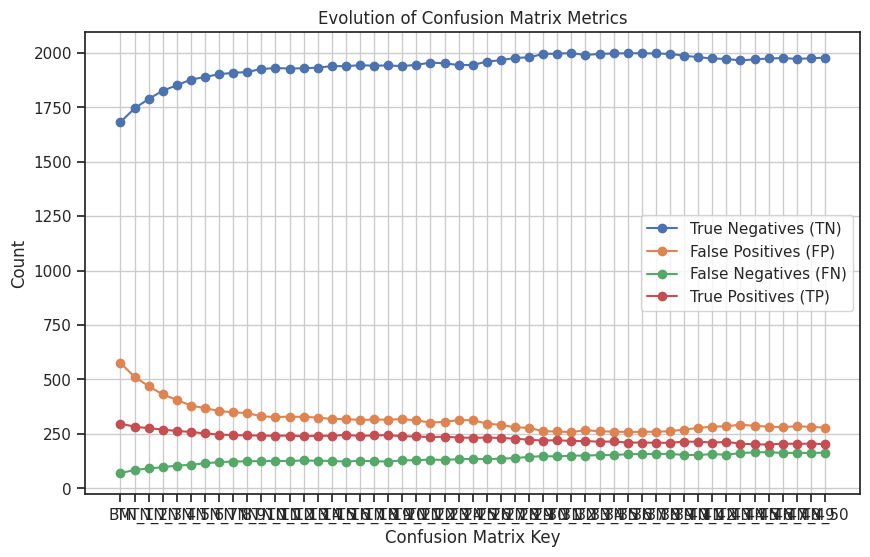

In [ ]:








import matplotlib.pyplot as plt

# Confusion matrices
conf_matrices = cm_dict.copy()

# Extract TN, FP, FN, and TP
metrics = {'TN': [], 'FP': [], 'FN': [], 'TP': []}
for cm in conf_matrices.values():
    TN, FP = cm[0]
    FN, TP = cm[1]
    metrics['TN'].append(TN)
    metrics['FP'].append(FP)
    metrics['FN'].append(FN)
    metrics['TP'].append(TP)

# Plot the metrics
fig, ax = plt.subplots(figsize=(10, 6))

keys = list(conf_matrices.keys())
ax.plot(keys, metrics['TN'], label='True Negatives (TN)', marker='o')
ax.plot(keys, metrics['FP'], label='False Positives (FP)', marker='o')
ax.plot(keys, metrics['FN'], label='False Negatives (FN)', marker='o')
ax.plot(keys, metrics['TP'], label='True Positives (TP)', marker='o')

ax.set_xlabel('Confusion Matrix Key')
ax.set_ylabel('Count')
ax.set_title('Evolution of Confusion Matrix Metrics')
ax.legend()

plt.grid(True)
plt.show()
